In [ ]:
%%bash
pip install geopandas
pip install descartes

In [3]:
from glob import glob
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
files = sorted(glob('/content/data/*/*.shp'))
print(files)

['/content/data/shp/Sainshand_sum.shp']


In [18]:
sainshand = gpd.read_file(files[0], SHAPE_RESTORE_SHX='YES')
crs = {'init': 'epsg:32649'}
sainshand.crs = crs
#utm_zone is 48N or code 32649



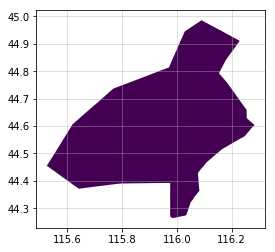

In [29]:
f, ax = plt.subplots(1,1)
cmaps = ['viridis']
sainshand_wgs = sainshand.to_crs({'init': 'epsg:4326'})
sainshand_wgs.plot(ax=ax, cmap=cmaps[0])
ax.grid(alpha=0.5)

In [30]:
sainshand_wgs.centroid

0    POINT (115.938524861939 44.60691719930802)
dtype: object

In [186]:
from shapely.geometry import Point
import random

def list_to_dataframe(data, crs={'init':'epsg:4326'}):
    outdf = gpd.GeoDataFrame(data, columns=['geometry'])
    outdf.crs = crs
    return(outdf)
 
def check_distance(point, point_list, min_distance, \
                   crs={'init':'epsg:4326'}, utm={'init':'epsg:32649'}):
    points = list_to_dataframe(point_list)
    points = points.to_crs(utm)
    p = list_to_dataframe([point]).to_crs(utm)
    p = p.to_crs(utm)
    distances = np.array([p.geometry.distance(pnt) for pnt in points.geometry])
    m = np.min(distances)
    if m>min_distance:
        return(True)
    else:
        return(False)
    
def random_points_in_polygon(number, polygon, min_distance):
    points = []
    min_x, min_y, max_x, max_y = polygon.bounds
    i = 0
    while i < number:
        candidate_point = Point(random.uniform(min_x, max_x), \
                                random.uniform(min_y, max_y))
        if polygon.contains(candidate_point):
            if i==0:
                points.append(candidate_point)
                i += 1
            if i>=1:
                if check_distance(candidate_point, points, min_distance):
                    points.append(candidate_point)
                    i += 1
                
    return gpd.GeoDataFrame(points, columns=['geometry'])  # returns list of shapely point

In [196]:
n = 300
points = random_points_in_polygon(n, ikhnart_bounds.iloc[0].geometry, 1000)

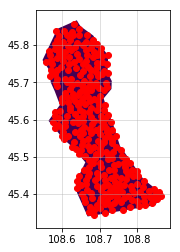

In [197]:
f, ax = plt.subplots(1,1)
cmaps = ['viridis']
ikhnart_bounds.plot(ax=ax, cmap=cmaps[0])
ax.grid(alpha=0.5)
points.plot(ax=ax, color='red')
points.crs = crs

In [233]:
import pandas as pd
out = pd.DataFrame(np.array([np.arange(len(points)),\
                             points.geometry.y,\
                             points.geometry.x]).T,\
                   columns=['PlotKey','Latitude','Longitude'])
out.PlotKey = out.PlotKey.astype(int)

In [235]:
out.to_csv('ikhnart_points_v1.csv',index=False)